In [4]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import zipfile
import urllib.request
import io
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
warnings.filterwarnings('ignore')

In [5]:
# combined data
# load processed data
train_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_median and train_latest
train = pd.concat([train_median, train_latest, train_dispers, train_min, train_max], axis=1)
X_train = train.drop(columns=['id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'dicom_id', 'study_id', 'ViewPosition', 'StudyDate', 'StudyTime', 'image_path', 'readmitted_within_30days'])
y_train = train['readmitted_within_30days']

# load processed data
test_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_median and train_latest
test = pd.concat([test_median, test_latest, test_dispers, test_min, test_max], axis=1)
X_test = test.drop(columns=['id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'dicom_id', 'study_id', 'ViewPosition', 'StudyDate', 'StudyTime', 'image_path'])
X_test

,HORMONES_mean_mode,ANTICOAGULANTS_mean_mode,ANTIARTHRITICS_mean_mode,ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS_mean_mode,BLOOD_mean_mode,DIURETICS_mean_mode,ANTIPARKINSON DRUGS_mean_mode,ANTIHISTAMINES_mean_mode,ANTIBIOTICS_mean_mode,CARDIOVASCULAR_mean_mode,...,EENT PREPS_max,age_max,ANALGESICS_max,COUGH/COLD PREPARATIONS_max,ANTIVIRALS_max,ANTIASTHMATICS_max,ANTIPARASITICS_max,SKIN PREPS_max,PRE-NATAL VITAMINS_max,ANTIFUNGALS_max
0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,...,0.0,57.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,15.0,0.0,...,1.0,81.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,0.0,0.0,2.0,14.0,0.0,0.0,7.0,0.0,...,5.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,...,3.0,75.0,8.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,75.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,0.0,3.0,0.0,0.0,7.0,16.0,0.0,0.0,9.0,1.0,...,1.0,63.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2932,1.0,3.0,0.0,0.0,3.0,4.0,0.0,2.0,11.0,0.0,...,0.0,64.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2933,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,3.0,...,0.0,64.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,77.0,7.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0


In [6]:
def esemble_tree_cv(weight, X_train = X_train, y_train = y_train):
    auc_scores = []
    for cv in range(5):
        X_test_cv = X_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5), :]
        y_test_cv = y_train.iloc[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)]
        X_train_cv = X_train.drop(X_train.index[cv*int(len(X_train)/5):(cv+1)*int(len(X_train)/5)])
        y_train_cv = y_train.drop(y_train.index[cv*int(len(y_train)/5):(cv+1)*int(len(y_train)/5)])

        Ext_best = ExtraTreesClassifier(
            max_depth=1135,
            min_samples_leaf=2,
            min_samples_split=2,
            n_estimators=1614
        )
        Ext_res = Ext_best.fit(X_train_cv, y_train_cv)
        Gb_best = GradientBoostingClassifier(
            learning_rate=0.05104619739803147,
            max_depth=10,
            min_samples_leaf=18,
            min_samples_split=17,
            n_estimators=103
        )
        Gb_res = Gb_best.fit(X_train_cv, y_train_cv)
        Xgb_best = XGBClassifier(
            learning_rate=0.07856721676232462,
            max_depth=7,
            n_estimators=78,
            scale_pos_weight=0.1
        )
        Xgb_res = Xgb_best.fit(X_train_cv, y_train_cv)

        y_pred_Ext = Ext_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Gb = Gb_res.predict_proba(X_test_cv)[:, 1]
        y_pred_Xgb = Xgb_res.predict_proba(X_test_cv)[:, 1]

        y_pred = weight[0]*y_pred_Ext + weight[1]*y_pred_Gb + weight[2]*y_pred_Xgb
        auc_scores.append(roc_auc_score(y_test_cv, y_pred))

        print(f'cv {cv} auc: {roc_auc_score(y_test_cv, y_pred)}')
    print(f'finished cv for {weight}')

    return np.mean(auc_scores)


In [7]:
weights = []
for weight_1 in np.linspace(0, 1, 10):
    for weight_2 in np.linspace(0, 1, 10):
        if weight_1 + weight_2 <= 1:
            weight_3 = 1 - weight_1 - weight_2
            weights.append([weight_1, weight_2, weight_3])

auc_scores = []
for weight in weights:
    auc_scores.append({'weight': weight, 'auc': esemble_tree_cv(weight)})

cv 0 auc: 0.7977095093356491
cv 1 auc: 0.8127674794341461
cv 2 auc: 0.7998303647158609
cv 3 auc: 0.7908882602183849
cv 4 auc: 0.8187931233118704
finished cv for [0.0, 0.0, 1.0]
cv 0 auc: 0.8016757040127935
cv 1 auc: 0.8134902134902136
cv 2 auc: 0.8046538726784143
cv 3 auc: 0.7954031669632228
cv 4 auc: 0.8228343936814347
finished cv for [0.0, 0.1111111111111111, 0.8888888888888888]
cv 0 auc: 0.8021946453724198
cv 1 auc: 0.8061321394654728
cv 2 auc: 0.7979966125789055
cv 3 auc: 0.7905976779016628
cv 4 auc: 0.8259859957244717
finished cv for [0.0, 0.2222222222222222, 0.7777777777777778]
cv 0 auc: 0.8012441354331042
cv 1 auc: 0.80344223677557
cv 2 auc: 0.7964257687094243
cv 3 auc: 0.7899832307121187
cv 4 auc: 0.8248172659660262
finished cv for [0.0, 0.3333333333333333, 0.6666666666666667]
cv 0 auc: 0.8019007551126315
cv 1 auc: 0.8064663731330397
cv 2 auc: 0.7966662174766619
cv 3 auc: 0.7919878646680064
cv 4 auc: 0.818087789142206
finished cv for [0.0, 0.4444444444444444, 0.5555555555555556

In [8]:
max_auc = 0
max_weight = []
for auc_score in auc_scores:
    if auc_score['auc'] > max_auc:
        max_auc = auc_score['auc']
        max_weight = auc_score['weight']
print(f'Best weight: {max_weight}')

Best weight: [0.1111111111111111, 0.1111111111111111, 0.7777777777777777]


In [18]:
df = pd.DataFrame(auc_scores)
df['weight_Ext'] = df['weight'].apply(lambda x: x[0]) #str(x[0])[-1]+'/9')
df['weight_Gb'] = df['weight'].apply(lambda x: x[1]) #str(x[1])[-1]+'/9')
df

,weight,auc,weight_Ext,weight_Gb
0,"[0.0, 0.0, 1.0]",0.803998,0.000000,0.000000
1,"[0.0, 0.1111111111111111, 0.8888888888888888]",0.807611,0.000000,0.111111
2,"[0.0, 0.2222222222222222, 0.7777777777777778]",0.804581,0.000000,0.222222
3,"[0.0, 0.3333333333333333, 0.6666666666666667]",0.803183,0.000000,0.333333
4,"[0.0, 0.4444444444444444, 0.5555555555555556]",0.803022,0.000000,0.444444
5,"[0.0, 0.5555555555555556, 0.4444444444444444]",0.802354,0.000000,0.555556
6,"[0.0, 0.6666666666666666, 0.33333333333333337]",0.802795,0.000000,0.666667
7,"[0.0, 0.7777777777777777, 0.22222222222222232]",0.801913,0.000000,0.777778
8,"[0.0, 0.8888888888888888, 0.11111111111111116]",0.799935,0.000000,0.888889
9,"[0.0, 1.0, 0.0]",0.799489,0.000000,1.000000


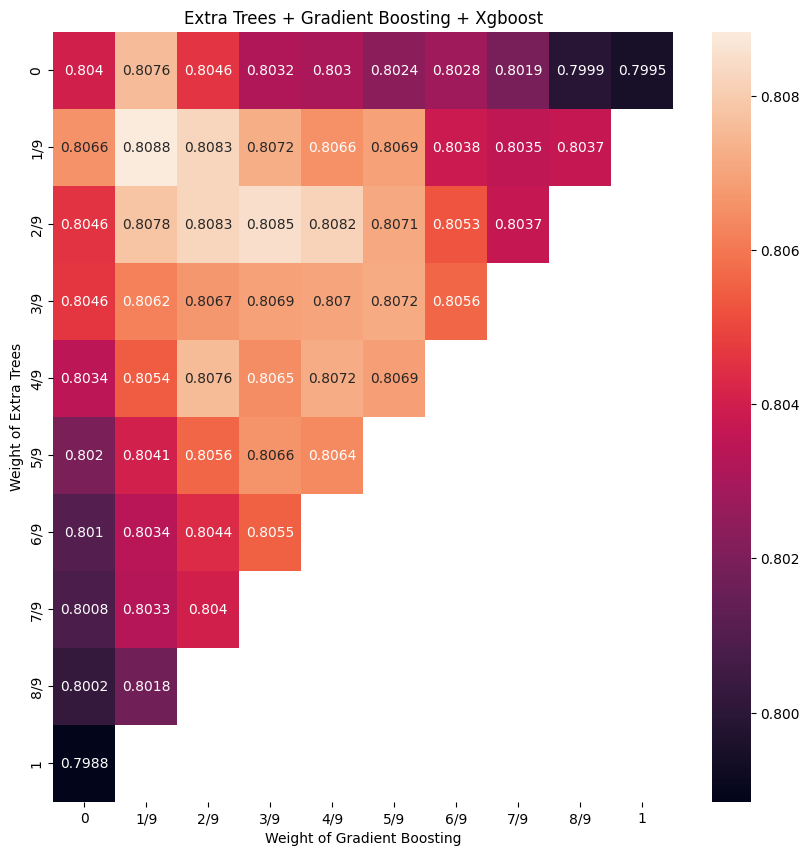

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
x_labels = ['0', '1/9', '2/9', '3/9', '4/9', '5/9', '6/9', '7/9', '8/9', '1']
y_labels = ['0', '1/9', '2/9', '3/9', '4/9', '5/9', '6/9', '7/9', '8/9', '1']
sns.heatmap(df.pivot('weight_Ext', 'weight_Gb', 'auc'), annot=True, fmt='.4g', xticklabels=x_labels, yticklabels=y_labels)

plt.xlabel('Weight of Gradient Boosting')
plt.ylabel('Weight of Extra Trees')
plt.title('Extra Trees + Gradient Boosting + Xgboost')
plt.show()

In [21]:
Ext_best = ExtraTreesClassifier(
    max_depth=1135,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=1614
)
Ext_res = Ext_best.fit(X_train, y_train)
Gb_best = GradientBoostingClassifier(
    learning_rate=0.05104619739803147,
    max_depth=10,
    min_samples_leaf=18,
    min_samples_split=17,
    n_estimators=103
)
Gb_res = Gb_best.fit(X_train, y_train)
Xgb_best = XGBClassifier(
    learning_rate=0.07856721676232462,
    max_depth=7,
    n_estimators=78,
    scale_pos_weight=0.1
)
Xgb_res = Xgb_best.fit(X_train, y_train)

y_pred_Ext = Ext_res.predict_proba(X_test)[:, 1]
y_pred_Gb = Gb_res.predict_proba(X_test)[:, 1]
y_pred_Xgb = Xgb_res.predict_proba(X_test)[:, 1]

y_pred = 1/9*y_pred_Ext + 1/9*y_pred_Gb + 7/9*y_pred_Xgb
y_pred

array([0.018128  , 0.04494935, 0.09195128, ..., 0.01411483, 0.04848102,
       0.07062707])

In [23]:
y_test_pred = pd.DataFrame(y_pred, columns=['readmitted_within_30days'])
y_test_pred = pd.concat([test['id'], y_test_pred], axis=1)
y_test_pred.to_csv("ensemble_extra_gb_xgb.csv", index = False)